In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [4]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

as we can see above we are getting only correlation for numeric Data

# Label Encoder

In [7]:
lencode=preprocessing.LabelEncoder()
df['sex']=lencode.fit_transform(df['sex'])

In [8]:
df.sex.unique()

array([1, 0], dtype=int64)

In [9]:
lencode=preprocessing.LabelEncoder()
df['rank']=lencode.fit_transform(df['rank'])

In [10]:
df['rank'].unique()

array([2, 1, 0])

In [11]:
lencode=preprocessing.LabelEncoder()
df['discipline']=lencode.fit_transform(df['discipline'])

In [12]:
df.discipline.unique()

array([1, 0])

In [13]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


In [14]:
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int64
salary           int64
dtype: object

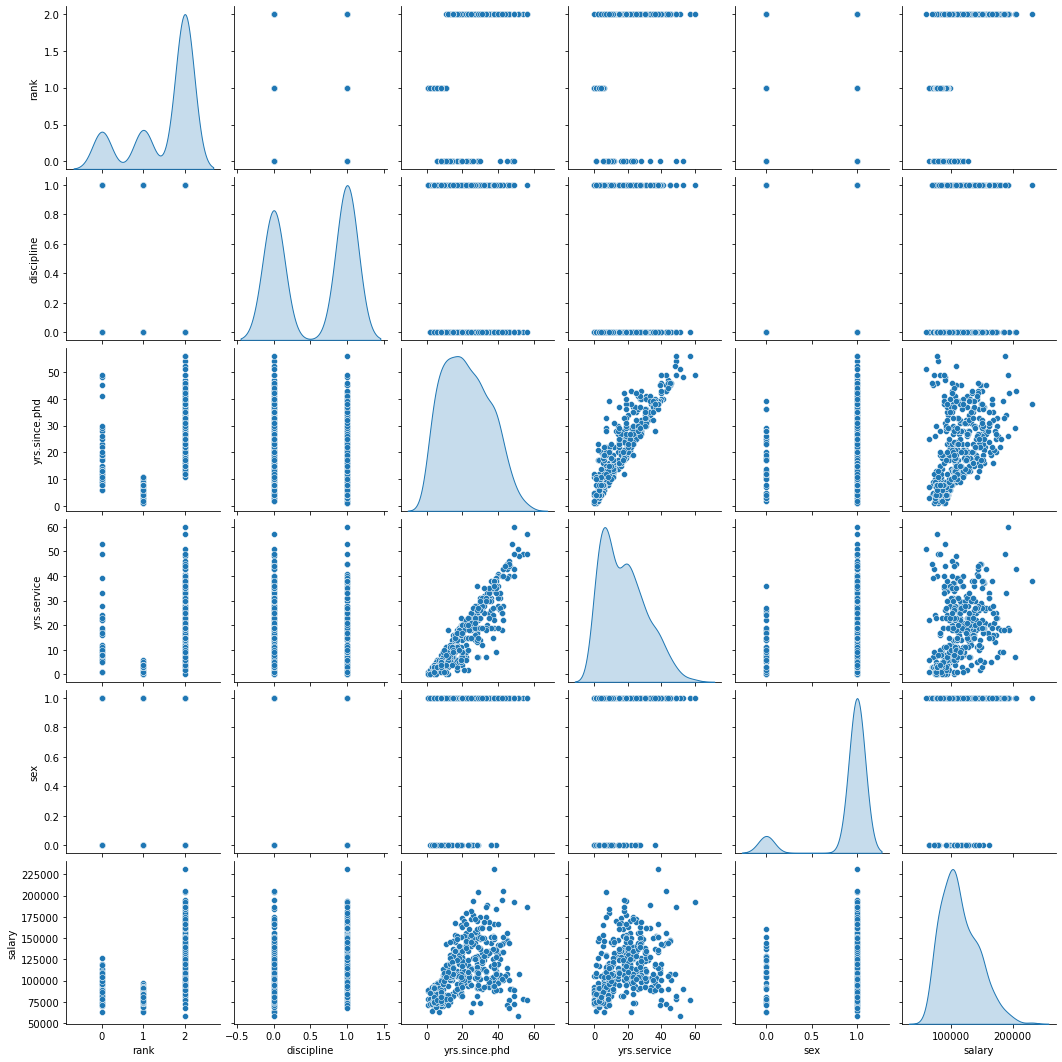

In [15]:
sns.pairplot(data=df, diag_kind='kde')

# Will check Description to find out skewness and Outliers

In [16]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


we can see yrs.since.phd and yrs.service having high std dev. Possibilities we will have outliers

if mean > 50% then we have skewness: yrs.since.phd, yrs.service

Comparison in 75% and Max to find Outliers columns: yrs.since.phd, yrs.service

# First validating the Outliers using Percentile

rank                AxesSubplot(0.125,0.536818;0.110714x0.343182)
discipline       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
yrs.since.phd    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
yrs.service      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
sex              AxesSubplot(0.656429,0.536818;0.110714x0.343182)
salary           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

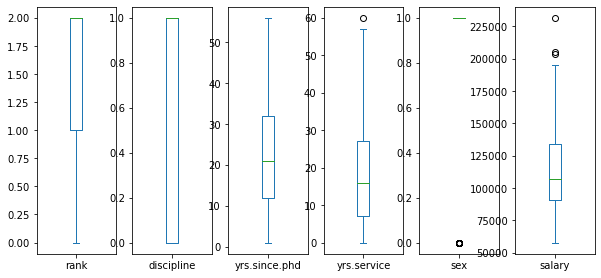

In [17]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [18]:
df['yrs.since.phd'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     1.0
0.1     5.0
0.2    10.0
0.3    13.0
0.4    17.4
0.5    21.0
0.6    25.0
0.7    30.0
0.8    35.0
0.9    40.0
1.0    56.0
Name: yrs.since.phd, dtype: float64

In [19]:
df['yrs.service'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     3.0
0.2     5.0
0.3     8.0
0.4    11.0
0.5    16.0
0.6    19.0
0.7    23.0
0.8    28.8
0.9    37.0
1.0    60.0
Name: yrs.service, dtype: float64

# Removing Outliers using Z score 

In [20]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))# abs will make it positive---> mod of x= x and -X---> if x=2 then mode of x=3 or x=-(-2)=2
z.shape

(397, 6)

In [21]:
thresold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [22]:
df_new=df[(z<3).all(axis=1)]

In [23]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [24]:
#df['yrs.since.phd'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [25]:
#df_new['yrs.since.phd'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [26]:
#df['yrs.service'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [27]:
#df_new['yrs.service'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Checking correlationship

As we can see the output is incremental hence try to remove the column which is less correlated with output Salary

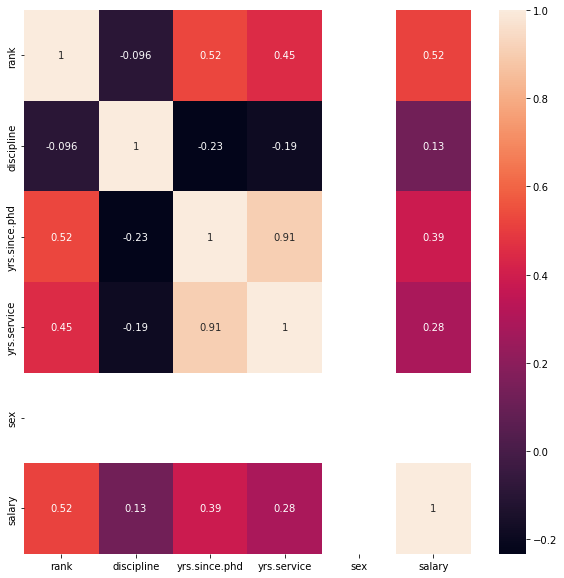

In [28]:
df_corr=df_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [29]:
# removing Sex column as we can see it is having NAN values
df_new.drop(columns='sex',axis=1,inplace=True)
df_new.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500


In [30]:
# removing Sex column as we can see it is having NAN values
df_new.drop(columns='discipline',axis=1,inplace=True)
df_new.head()

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500


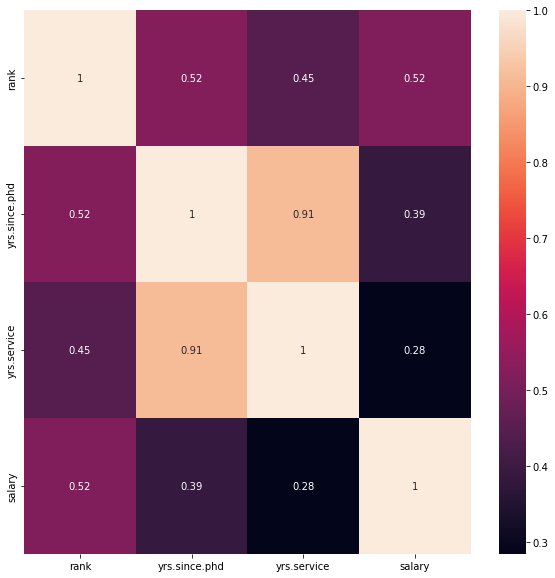

In [31]:
df_corr=df_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

# Checking ISNULL values

In [32]:
df_new.isnull().sum()

rank             0
yrs.since.phd    0
yrs.service      0
salary           0
dtype: int64

<AxesSubplot:>

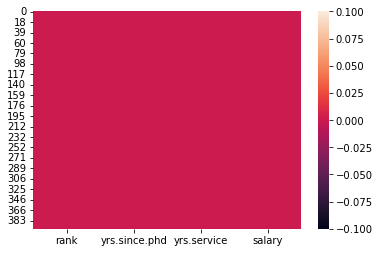

In [33]:
sns.heatmap(df_new.isnull()) 

# Remove Skewness

<AxesSubplot:ylabel='Frequency'>

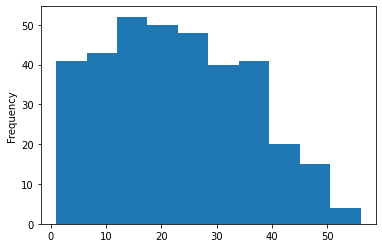

In [34]:
df_new['yrs.since.phd'].plot.hist()

In [35]:
from scipy.stats import boxcox
df_new['yrs.since.phd']= boxcox(df_new['yrs.since.phd'],0)

<AxesSubplot:ylabel='Frequency'>

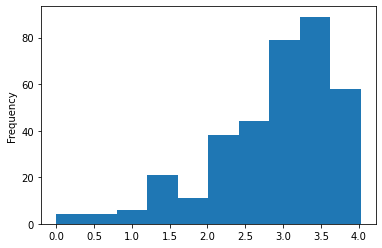

In [36]:
df_new['yrs.since.phd'].plot.hist()

# Testing and Training

In [37]:
x=df_new.drop("salary",axis=1)

In [38]:
x.head()

,rank,yrs.since.phd,yrs.service
0,2,2.944439,18
1,2,2.995732,16
2,1,1.386294,3
3,2,3.806662,39
4,2,3.688879,41


In [39]:
y=df_new['salary']

In [40]:
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

# Accuracy checking with For loop for Test Size and  random_state For Linear Regression

In [137]:
x=df_new.drop("salary",axis=1)
y=df_new['salary']

from sklearn.linear_model import LinearRegression

maxAcc = 0
maxRs=0

for i in range(1,40):
    i1 = i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i)#=.10,random_state=i) #10====TS=0.02
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=lm.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45==

Best accuracy is 83.5079245656724 on Random state 2


In [141]:
x=df_new.drop("salary",axis=1)
y=df_new['salary']

from sklearn.linear_model import LinearRegression

maxAcc = 0
maxRs=0

for i in range(1,300):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.02,random_state=i) #10/RS=252
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=lm.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

Best accuracy is 73.01946965151865 on Random state 252


# Checking Accuracy for Linear Regression

In [142]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [143]:
x=df_new.drop("salary",axis=1)
y=df_new['salary']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.02,random_state=252)
pred=lm.predict(x_test)
print("predicted values",pred)
print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))


predicted values [121389.8146216  123634.23965939 122211.03454342  95884.17592671
  92318.00210871  89386.59778999  88116.91575471 121161.08626767]
predicted values 81     135585
353    138000
97     129676
55      83900
27      82379
379    104121
149     95079
296    126300
Name: salary, dtype: int64


(73.48930466159847, 10598.061174828577, 11169.097785805607)

In [144]:
lm.score(x_test,y_test)

0.7348930466159846

In [145]:
lm.coef_

array([14513.45864277, 18826.83290311,  -652.42013015])

# Regularization

as we can see the model is not predicting well might can be because of over or under fitting Data
hence will use regualrization to check the prediction improvement

In [146]:
from sklearn.linear_model import Lasso,Ridge

In [147]:
ls=Ridge(alpha=0.001)
ls.fit(x_train,y_train)
r2_score(y_test, pred)*100

73.48930466159847

In [148]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.1)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
r2_score(y_test, pred)*100
enr.coef_

array([13603.49639544, 16263.78418496,  -516.38898627])

checking with classifier algorithm in Regression as SVR, DTR, Knr

Checked with SVR and Decision Tree algorith but not getting expected Accuracy so going to neglate this

In [149]:
#from sklearn.svm import SVR


#sv=SVR(kernel='linear')
#sv.fit(x_train,y_train)
#print("linear:",sv.score(x_train,y_train)*100)

#sv=SVR(kernel='poly')
#sv.fit(x_train,y_train)
#print("poly:",sv.score(x_train,y_train)*100)

#sv=SVR(kernel='rbf')
#sv.fit(x_train,y_train)
#print("rbf:",sv.score(x_train,y_train)*100)



In [118]:
# poly and rbf are getting 0

#x=df_new.drop("salary",axis=1)
#y=df_new['salary']

#maxAcc = 0
#maxRs=0

#from sklearn.svm import SVR


#for i in range(1,40):
#    i1=i*0.01
#    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
 #   sv=SVR(kernel='linear')
 #   sv.fit(x_train,y_train)
 #   pred=sv.predict(x_test)
 #   acc=sv.score(x_train,y_train)
 #   #print('accuracy',acc,'Random state',i)
    
  #  if acc>maxAcc:
 #       maxAcc=acc
 #       maxRs=i
 #       #print('accuracy',maxAcc,'Random state',i)

#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

In [119]:
# poly and rbf are getting 0

#x=df_new.drop("salary",axis=1)
#y=df_new['salary']

#maxAcc = 0
#maxRs=0

#from sklearn.svm import SVR


#for i in range(1,350):
#    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.26,random_state=i)
 #   sv=SVR(kernel='linear')
 #   sv.fit(x_train,y_train)
#    pred=sv.predict(x_test)
 #   acc=sv.score(x_train,y_train)
#    #print('accuracy',acc,'Random state',i)
    
 #   if acc>maxAcc:
 #       maxAcc=acc
 #       maxRs=i
 #       #print('accuracy',maxAcc,'Random state',i)
#
#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

# checking with DecisionTreeRegressor algorithm 

In [120]:
#x=df_new.drop("salary",axis=1)
#y=df_new['salary']
#x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2) #19/50
##pred=lm.predict(x_test)
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

In [121]:
#from sklearn.tree import DecisionTreeRegressor 
  
#regressor = DecisionTreeRegressor(random_state = 0) 
#regressor.fit(x_train,y_train)
#print("regressor:",regressor.score(x_train,y_train)*100)
#print("regressor:",regressor.score(x_test,y_test)*100)

In [122]:
# poly and rbf are getting 0

#x=df_new.drop("salary",axis=1)
#y=df_new['salary']

#maxAcc = 0
#maxRs=0

#from sklearn.tree import DecisionTreeRegressor 


#for i in range(1,350):
#    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20)
#    DT=DecisionTreeRegressor(random_state = i) 
 #   DT.fit(x_train,y_train)
 #   pred=DT.predict(x_test)
 #   acc=DT.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
  #  if acc>maxAcc:
  #      maxAcc=acc
  #      maxRs=i
  #      #print('accuracy',maxAcc,'Random state',i)

#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

In [123]:
# poly and rbf are getting 0

#x=df_new.drop("salary",axis=1)
#y=df_new['salary']

#maxAcc = 0
#maxRs=0

#from sklearn.tree import DecisionTreeRegressor 


#for i in range(1,50):
#    i1=i*0.01
#    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
 #   DT=DecisionTreeRegressor() 
#    DT.fit(x_train,y_train)
 #   pred=DT.predict(x_test)
 #   acc=DT.score(x_test,y_test)
 #   #print('accuracy',acc,'Random state',i)
    
  #  if acc>maxAcc:
 #       maxAcc=acc
  #      maxRs=i
  #      #print('accuracy',maxAcc,'Random state',i)

#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

In [124]:
#regressor.score(x_test,y_test)

# checking with K Nearest Regressor algorithm 

In [125]:
#
#x=df_new.drop("salary",axis=1)
#y=df_new['salary']
#x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.35,random_state=20)  # 35/20=84.14  50/20=84.19

#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
#

In [126]:
#from sklearn.neighbors import KNeighborsRegressor
#KNR = KNeighborsRegressor(n_neighbors=19)
#KNR.fit(x_train, y_train)
#pred=KNR.predict(x_test)
#print("KNR:",KNR.score(x_train,y_train)*100)
#print("KNR:",KNR.score(x_test,y_test)*100)
#print("KNR:",regressor.score(pred,y_test))

In [127]:
#print("predicted values",pred)
#print("predicted values",y_test)

In [128]:
# poly and rbf are getting 0

#x=df_new.drop("salary",axis=1)
#y=df_new['salary']
#
#maxAcc = 0
#maxRs=0

#from sklearn.neighbors import KNeighborsRegressor 


#for i in range(1,350):
#   x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1,random_state=i)
 #   DT=KNeighborsRegressor() 
  #  DT.fit(x_train,y_train)
   # pred=DT.predict(x_test)
   # acc=DT.score(x_test,y_test)
   # #print('accuracy',acc,'Random state',i)
    
 #   if acc>maxAcc:
 #       maxAcc=acc
 #       maxRs=i
 #       #print('accuracy',maxAcc,'Random state',i)#

#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

In [129]:
# poly and rbf are getting 0

#x=df_new.drop("salary",axis=1)
#y=df_new['salary']

#maxAcc = 0
#maxRs=0

#from sklearn.neighbors import KNeighborsRegressor 


#for i in range(1,50):
#    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.6,random_state=i)
#    DT=KNeighborsRegressor() 
#    DT.fit(x_train,y_train)
 #   pred=DT.predict(x_test)
#    acc=DT.score(x_test,y_test)
#    #print('accuracy',acc,'Random state',i)
    
 #   if acc>maxAcc:
 #       maxAcc=acc
 #       maxRs=i
        #print('accuracy',maxAcc,'Random state',i)

#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

# RandomForestRegressor

In [130]:
# poly and rbf are getting 0
#from sklearn.ensemble import RandomForestRegressor
    
#x=df_new.drop("salary",axis=1)
#y=df_new['salary']

#maxAcc = 0
#maxRs=0

#from sklearn.tree import RandomForestRegressor 


#for i in range(1,350):
#    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=i)
#    DT=RandomForestRegressor()
#    DT.fit(x_train,y_train)
#    pred=DT.predict(x_test)
#    acc=DT.score(x_test,y_test)
#    #print('accuracy',acc,'Random state',i)
    
#    if acc>maxAcc:
#        maxAcc=acc
#        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
#
#print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

# Hyper Parameter Tunning

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion':['mse','entropy']}

In [252]:
#GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring="accuracy")

GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto'}

In [253]:
GCV=RandomForestRegressor(criterion= 'mse', max_depth= 4, max_features= 'auto')
GCV.fit(x_train,y_train)

RandomForestRegressor(max_depth=4)

In [254]:
y_pred=GCV.predict(x_test)
y_pred

array([127028.62798071, 128670.41784387, 119940.84757005,  97853.50136369,
        79460.06319085,  95768.12582522,  81081.4453889 , 127429.9665941 ])

In [256]:
r2_score(y_test, y_pred)

0.8073505620423078

# Testing the one sample Data with KNR

In [257]:
#2	19	18	139750

In [258]:
t=np.array([2,19,18])

In [259]:
t.shape

(3,)

In [260]:
t=t.reshape(1,-1)
t.shape

(1, 3)

In [261]:
lm.predict(t)

array([424454.36531303])